pandas中4个高级应用函数

- applymap：元素级
- apply：行列级
- transform：行列级
- 还有另外一个管道函数pipe()，是表级的应用函数。

以下是内容展示，完整数据、和代码可戳👉《pandas进阶宝典V1.1.6》进行了解。

# pipe函数介绍

函数：

pipe函数可应用在series和dataframe两个数据结构上。

    series.pipe(func, *args, **kwargs)
    dataframe.pipe(func, *args, **kwargs)
    ------
    返回：函数的返回类型

参数：

- func：用于处理数据的函数，可以是内置函数、库函数、自定义函数或匿名函数
- *args：指定传递给函数位置参数
- **kwargs：指定传递给函数的关键字

# pipe函数应用

## 一、单个函数

以上pipe分别传入了numpy的exp函数和逆函数，都是单个函数，实现了对数据进行了e次方操作，并结果保留小数点后两位有效数字。

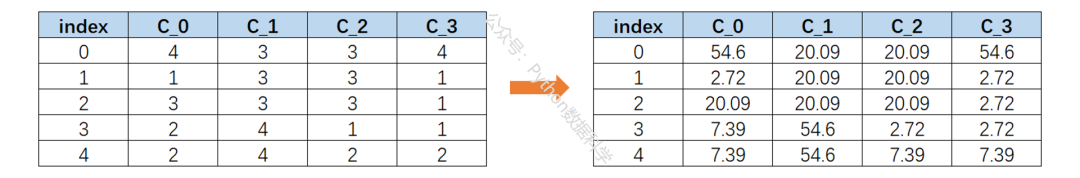

当只传入一个函数时，pipe()的效果等同于直接用函数对dataframe处理：func(df)，与apply()、applymap()、map()等的处理结果是一样的。

这种基础操作建议优先使用apply()函数，pipe()函数的精髓在于链式调用。

## 二、链式调用

我们先用三个函数分别对dataframe操作。

In [ ]:
df_01 = np.square(df)
df_02 = np.multiply(df_01, 1.5)
df_03 = np.add(df_02, 8)

三个函数按顺序依次对dataframe操作，第一个函处理后的结果返回给第二个函数，第二个给第三个。如果想省略临时的dataframe也可以将函数像下面这样套用一行代码解决。

In [ ]:
rlt = np.add(np.multiply(np.square(df), 1.5), 8)

但上面的写反可读性太差了，一点不优雅，而且随着嵌套增多非常容易看错。这种情况就该pipe()管道函数登场了。

In [ ]:
pi = df.pipe(np.square). \
        pipe(np.multiply, 1.5). \
        pipe(np.add, 8) 

或者

In [ ]:
pi = (df.pipe(np.square)
        .pipe(np.multiply, 1.5)
        .pipe(np.add, 8))

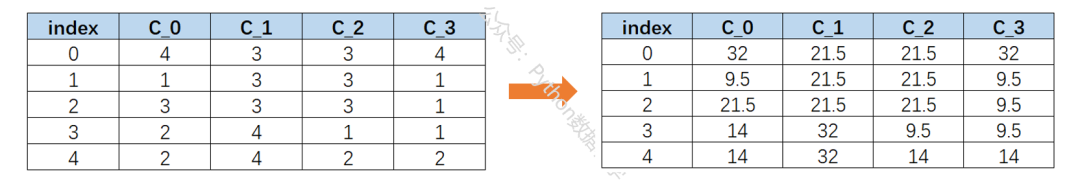

pipe链式调用的原理是：

pipe将每次执行完的函数结果传递给下一个函数，即上个输出作为下个函数的输入，以此类推像链子一样可以一直传递下去，这也是管道函数名字的由来。

这样做的优点是：

- 执行顺序一目了然，逻辑清晰
- 可读性很高
- 非常优雅

## 三、特殊传参方式

pipe()默认情况下会将dataframe传给调用函数的第一个参数，但一些函数在定义时第一个参数并不是用来接收dataframe输入数据的，如果直接将函数传到pipe()中会提示报错。

为了解决这个问题，pipe()中规定了一种特殊的参数传递方法，是元组(callable, data_keyword)的形式。

- callable：指定在pipe()中调用的函数
- data_keyword：指定将dataframe传给函数中的哪一个参数

In [ ]:
def spcl(num, df):
    return df.add(num)
df.pipe((spcl,'df'), 2)

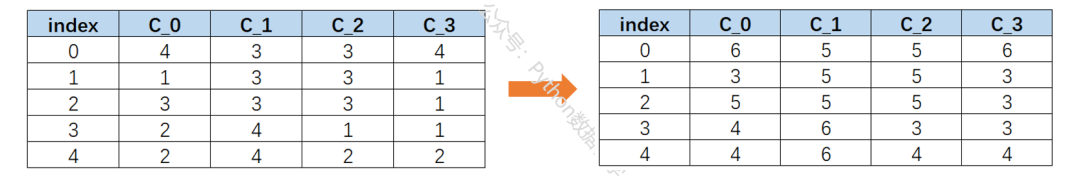

以上pipe()中用(spcl,'df')代替了常规时的函数spcl，清楚地指明了函数中的df参数是接受dataframe数据的参数，这样就不会报错。此外，函数的*args和**kwargs传递方式不变。